In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
hotelReviews = pd.read_csv('HotelReviewsCountryCity.csv')
cities = ['Paris', 'Amsterdam', 'London', 'Milan', 'Barcelona', 'Vienna']
countries = ['France', 'Netherlands', 'United Kingdom', 'Italy', 'Spain', 'Austria']

# MULTIPLE HOTELS WITH DIFFERENT NAMES

In [ ]:
### Same Name, Different Hotel:::
len(list(hotelReviews['Hotel_Name'].drop_duplicates())), len(list(hotelReviews[['Hotel_Name', 'Hotel_Address']].drop_duplicates()['Hotel_Name']))

In [ ]:
# Hotel_Name
# City
# Reviewer_Score
# Reviewer_Nationality
# Average_Reviewer_Score
# Average_Non_Reviewer_Score
# Average_General

revScoreTable = hotelReviews[[ 'Hotel_Name', 
                               'Reviewer_Score']]

genScoreTable = hotelReviews[[ 'Hotel_Name', 
                               'Average_Score']].drop_duplicates()

hotelNames = list(hotelReviews['Hotel_Name'].drop_duplicates())
plt.figure(figsize=(15,7))

plt.hist(genScoreTable['Average_Score'], normed=True)
data=genScoreTable['Average_Score'].values
fit = stats.norm.pdf(data, data.mean(), data.std())
plt.title('Distribution of Average Scores of Hotels and Associated Normal Curve')
plt.xlabel('Average Ratings')
plt.ylabel('PDF / Percentile')
#print relCities['Reviewer_Score'].std(), relCities['Reviewer_Score'].mean()
plt.plot(genScoreTable['Average_Score'],fit,'o')

#plt.show()
plt.savefig('AVG_Rat')
#print cityName
#for p in [5, 40, 60, 80, 90, 95]:
#    print '\t', p, np.percentile(relCities['Reviewer_Score'], p)

In [ ]:
plt.figure(figsize=(15,7))

plt.hist(revScoreTable['Reviewer_Score'], normed=True)
data=revScoreTable['Reviewer_Score'].values
fit = stats.norm.pdf(data, data.mean(), data.std())

plt.title('Distribution of Reviewer Scores of Hotels and Associated Normal Curve')
plt.xlabel('Scores')
plt.ylabel('PDF / Percentile')
#print relCities['Reviewer_Score'].std(), relCities['Reviewer_Score'].mean()
plt.plot(revScoreTable['Reviewer_Score'],fit,'o')
#plt.show()
plt.savefig('Rev_Rat')

In [32]:
# CRIT PLOT!
revScores = hotelReviews['Reviewer_Score']
allRevPercs = []
allRats = np.sort(np.array(list(set(revScores))))
p = 0
for rat in np.arange(0,10.1,0.1):#allRats:
    while(np.percentile(revScores, p) < rat):
        p += .1
        
    allRevPercs.append([p, rat])
    #for p in np.arange(0,100,0.1):
    #print p, np.percentile(allRatings, p)
    #pltPts.append([p, np.percentile(allRatings, p)])
    
allRevPercs = np.array(allRevPercs)
plt.figure(figsize=(15,7))
plt.title('Reviewers Ratings Distributions : Globally')
plt.xlabel('Rating')
plt.ylabel('Percentile')
plt.bar(allRevPercs[:,1], allRevPercs[:,0],width=0.3)
plt.xticks([i for i in range(11)])
#plt.yticks([])
plt.show()
#plt.savefig('Rev_Rat_Dist')

In [36]:

plt.figure(figsize=(15,7))
plt.title('Reviewers Ratings Distributions : Globally')
plt.xlabel('Rating')
plt.ylabel('Percentile')
plt.bar(allRevPercs[:,1], allRevPercs[:,0],width=0.1)
plt.xticks([i for i in range(11)])
#plt.yticks([])
#plt.show()
plt.savefig('Rev_Rat_Dist')

In [ ]:
# CRIT PLOT!

allRevPercs = []
avgScores = genScoreTable['Average_Score'].values
allRats = np.sort(np.array(list(set(genScoreTable['Average_Score']))))
p = 0
for rat in np.arange(0,9.8,0.1):#allRats:
    while(np.percentile(avgScores, p) < rat):
        p += .1
        
    allRevPercs.append([p, rat])
    #for p in np.arange(0,100,0.1):
    #print p, np.percentile(allRatings, p)
    #pltPts.append([p, np.percentile(allRatings, p)])
    
allRevPercs = np.array(allRevPercs)
plt.figure(figsize=(15,7))
plt.title('Percentile of All given Ratings')
plt.xlabel('Rating')
plt.ylabel('Percentile')
plt.bar(allRevPercs[:,1], allRevPercs[:,0])
plt.xticks([i for i in range(11)])
#plt.yticks([])
#plt.show()
plt.savefig('Perc_avg_Scores')
#print allRevPercs

# Analysis of Bad, Average, Good and Excellent Reviews By City

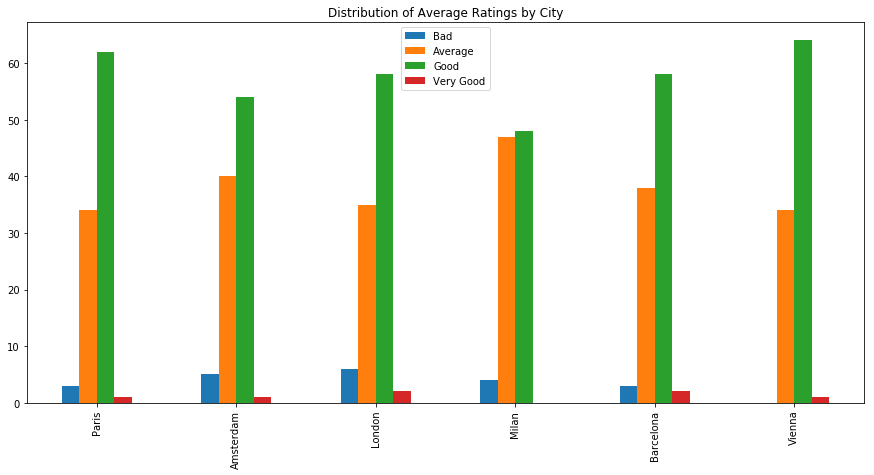

,Bad,Average,Good,Very Good
Paris,3,34,62,1
Amsterdam,5,40,54,1
London,6,35,58,2
Milan,4,47,48,0
Barcelona,3,38,58,2
Vienna,0,34,64,1


In [46]:
#hotRevs = hotelReviews[['Hotel_Name', 'City', 'Reviewer_Score', 'Reviewer_Nationality']]
hotRevs = hotelReviews[['Hotel_Name', 'City', 'Average_Score']].drop_duplicates()
# 0   - 6.3   Bad
# 6.3 - 8.0   Sufficient
# 8.0 - 8.9   Satisfactory
# 8.9 - 9.6   Good
# 9.6 - 10    Very Good

######
# Redo This by Average Scores
# 

#0 – 8.1​
#8.2 - 8.4​
#8.4 - 8.6​
#8.6 - 9.0​
#9.1 - 10​

reviews = hotRevs['Average_Score']
binRevs = []
for r in reviews:
    if r < 7.5:
        binRevs.append(0)
    elif r < 8.4:
        binRevs.append(1)
    elif r < 9.5:
        binRevs.append(2)
    #elif r < 9.5:
    #    binRevs.append(3)
    else:
        binRevs.append(3)
hotRevs['Review_Labels'] = binRevs
reviewDistbyCity(cities, hotRevs, pltTitle = 'Distribution of Average Ratings by City')

C:\Users\bingoel\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


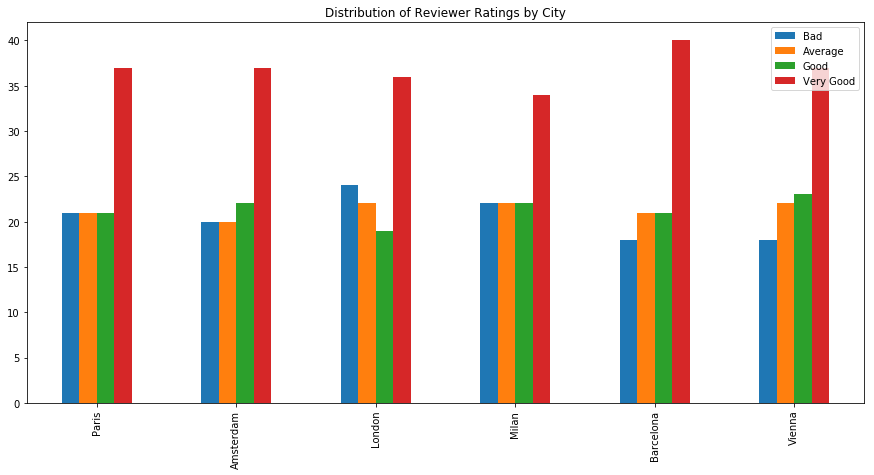

In [45]:
hotRevs = hotelReviews[['Hotel_Name', 'City', 'Reviewer_Score', 'Reviewer_Nationality']]
#hotRevs = hotelReviews[['Hotel_Name', 'City', 'Average_Score']].drop_duplicates()
# 0   - 6.3   Bad
# 6.3 - 8.0   Sufficient
# 8.0 - 8.9   Satisfactory
# 8.9 - 9.6   Good
# 9.6 - 10    Very Good

######
# Redo This by Average Scores
# 

#0 – 8.1​
#8.2 - 8.4​
#8.4 - 8.6​
#8.6 - 9.0​
#9.1 - 10​

reviews = hotRevs['Reviewer_Score']
binRevs = []
for r in reviews:
    if r < 7.5:
        binRevs.append(0)
    elif r < 8.4:
        binRevs.append(1)
    #elif r < 9.1:
    #    binRevs.append(2)
    elif r < 9.5:
        binRevs.append(2)
    else:
        binRevs.append(3)
hotRevs['Review_Labels'] = binRevs
cdf = reviewDistbyCity(cities, hotRevs, pltTitle = 'Distribution of Reviewer Ratings by City')

In [43]:
def reviewDistbyCity(allCities, hotRevs, nation = '', pltTitle = ''):
    #ctyDF = pd.DataFrame(index=allCities, columns=['Bad', 'Sufficient','Satisfactory', 'Good', 'Very Good'])
    ctyDF = pd.DataFrame(index=allCities, columns=['Bad', 'Average', 'Good', 'Very Good'])

    for c in allCities:
        if nation is '':
            c_Mat = hotRevs.loc[hotRevs['City'] == c]
        else:
            c_Mat = hotRevs.loc[(hotRevs['City'] == c)].loc[hotRevs['Reviewer_Nationality'] == nation]
            
        rArr = np.array(c_Mat['Review_Labels'])
        r1 = 1.0 * sum(rArr == 0)
        r2 = 1.0 * sum(rArr == 1)
        r3 = 1.0 * sum(rArr == 2)
        r4 = 1.0 * sum(rArr == 3)
        #r5 = 1.0 * sum(rArr == 4)

        #binRevs = [ np.round(10000 * badR / rArr.shape[0]) / 100, 
        #            np.round(10000 * avgR / rArr.shape[0]) / 100,
        #            np.round(10000 * goodR / rArr.shape[0]) / 100,
        #            np.round(10000 * excR / rArr.shape[0]) / 100]

        binRevs = [ np.round(100 * r1 / rArr.shape[0]),
                    np.round(100 * r2 / rArr.shape[0]),
                    np.round(100 * r3 / rArr.shape[0]),
                    np.round(100 * r4 / rArr.shape[0])]
                    #np.round(100 * r5 / rArr.shape[0])]


        ctyDF['Bad'][c] = binRevs[0]
        ctyDF['Average'][c] = binRevs[1]
        ctyDF['Good'][c] = binRevs[2]
        ctyDF['Very Good'][c] = binRevs[3]
        #ctyDF['Very Good'][c] = binRevs[4]

    fig_size = plt.rcParams["figure.figsize"]
 
    fig_size[0] = 15
    fig_size[1] = 7
    ctyDF.plot.bar()
    
    figName = 'City by Percentage of Reviews2'
    if nation is not '':
        figName = figName + ' by '+nation+'Nationales'
    plt.title(pltTitle)
    plt.savefig(figName)
    plt.show()
    return ctyDF

# Franchise Analysis

In [ ]:
h, list(hotelReviews['Hotel_Name'])

In [48]:
hotelReviews = pd.read_csv('Hotel_Reviews.csv')
hotNames = list(hotelReviews['Hotel_Name'])
hotNames = [i.lower() for i in hotNames]
hotelReviews['Hotel_Name'] = hotNames

hotelNames = ['Best Western', 'Mercure', 'Hilton','Novotel', 'Marriott', 
'Holiday Inn', 'Luxury Collection', 'NH Collection', 'Starhotels', 
'IH Hotels', 'Autograph Collection', 'Radisson Blu']

hotelNames = [i.lower() for i in hotelNames]
ctyDF = pd.DataFrame(index=hotelNames, columns=['Bad', 'Average','Good', 'Very Good'])

for h in hotelNames:
    hns = list(hotelReviews['Hotel_Name'])
    hns = [True if h in hn else False for hn in hns]
    hotelMat = hotelReviews[hns]
    hotelMat = hotelMat[['Hotel_Name', 'Reviewer_Score']]
    reviews = hotelMat['Reviewer_Score']
    binRevs = []
    for r in reviews:
        if r < 7.5:
            binRevs.append(0)
        elif r < 8.4:
            binRevs.append(1)
        #elif r < 9.1:
        #    binRevs.append(2)
        elif r < 9.5:
            binRevs.append(2)
        else:
            binRevs.append(3)
    rArr = np.array(binRevs)
    r1 = 1.0 * sum(rArr == 0)
    r2 = 1.0 * sum(rArr == 1)
    r3 = 1.0 * sum(rArr == 2)
    r4 = 1.0 * sum(rArr  == 3)
    #r5 = 1.0 * sum(rArr == 4)

    binRevs = [ np.round(100 * r1 / rArr.shape[0]),
                    np.round(100 * r2 / rArr.shape[0]),
                    np.round(100 * r3 / rArr.shape[0]),
                    np.round(100 * r4 / rArr.shape[0])]
                    #np.round(100 * r5 / rArr.shape[0])]


    ctyDF['Bad'][h] = binRevs[0]
    ctyDF['Average'][h] = binRevs[1]
    ctyDF['Good'][h] = binRevs[2]
    ctyDF['Very Good'][h] = binRevs[3]

        
        
    #hotelMat['Review_Labels'] = binRevs
    #hotelMat['Hotel_Name']
    #print h, hotelMat.shape


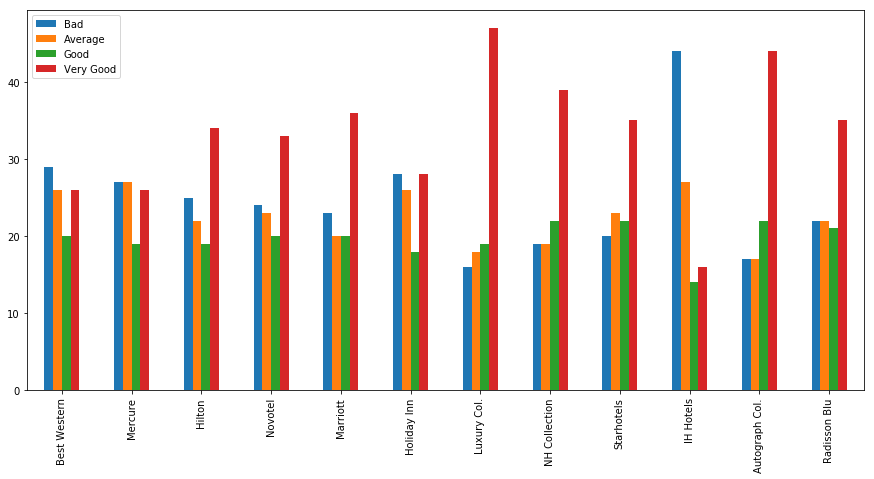

In [50]:
    
ctyDF2= pd.DataFrame(index=['Best Western', 'Mercure', 'Hilton','Novotel', 'Marriott', 'Holiday Inn', 'Luxury Col.', 'NH Collection', 'Starhotels', 'IH Hotels', 'Autograph Col.', 'Radisson Blu'], columns=['Bad', 'Average','Good', 'Very Good'])

ctyDF2['Bad'] = list(ctyDF['Bad'])
ctyDF2['Average'] = list(ctyDF['Average'])
ctyDF2['Good'] = list(ctyDF['Good'])
ctyDF2['Very Good'] = list(ctyDF['Very Good'])

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 15
fig_size[1] = 7
ctyDF2.plot.bar()

plt.savefig('Franchise Hotel Review Distributions')
plt.show()
